# *Supply Chain Dataset:*

## *Dataset Description:*
        
        Type:  Type of transaction made
        Days for shipping (real):  Actual shipping days of the purchased product
        Days for shipment (scheduled):  Days of scheduled delivery of the purchased product
        Benefit per order:  Earnings per order placed
        Sales per customer:  Total sales per customer made per customer
        Delivery Status:  Delivery status of orders: Advance shipping, Late delivery, Shipping canceled, Shipping on time"
        Late_delivery_risk:  Categorical variable that indicates if sending is late (1), it is not late (0)."
        Category Id:  Product category code
        Category Name:  Description of the product category
        Customer City:  City where the customer made the purchase
        Customer Country:  Country where the customer made the purchase
        Customer Email:  Customer's email
        Customer Fname:  Customer name
        Customer Id:  Customer ID
        Customer Lname:  Customer lastname
        Customer Password:  Masked customer key
        Customer Segment:  Types of Customers: Consumer , Corporate , Home Office"
        Customer State:  State to which the store where the purchase is registered belongs
        Customer Street:  Street to which the store where the purchase is registered belongs
        Customer Zipcode:  Customer Zipcode
        Department Id:  Department code of store
        Department Name:  Department name of store
        Latitude:  Latitude corresponding to location of store
        Longitude:  Longitude corresponding to location of store
        Market:  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA"
        Order City:  Destination city of the order
        Order Country:  Destination country of the order
        Order Customer Id:  Customer order code
        order date (DateOrders):  Date on which the order is made
        Order Id:  Order code
        Order Item Cardprod Id:  Product code generated through the RFID reader
        Order Item Discount:  Order item discount value
        Order Item Discount Rate:  Order item discount percentage
        Order Item Id:  Order item code
        Order Item Product Price:  Price of products without discount
        Order Item Profit Ratio:  Order Item Profit Ratio
        Order Item Quantity:  Number of products per order
        Sales:  Value in sales
        Order Item Total:  Total amount per order
        Order Profit Per Order:  Order Profit Per Order
        Order Region:  Region of the world where the order is delivered:  Southeast Asia ,South Asia ,Oceania ,Eastern Asia, 
            West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , 
            Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia ,  
            Europe , Central America, Eastern Europe , South of  USA "
        Order State:  State of the region where the order is delivered
        Order Status:  Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD, 
            ON_HOLD ,PAYMENT_REVIEW"
        Product Card Id:  Product code
        Product Category Id:  Product category code
        Product Description:  Product Description
        Product Image:  Link of visit and purchase of the product
        Product Name:  Product Name
        Product Price:  Product Price
        Product Status:  Status of the product stock :If it is 1 not available , 0 the product is available "
        Shipping date (DateOrders):  Exact date and time of shipment
        Shipping Mode:  The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day"

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('Display.max_columns',None)

data_set = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin1')
data_set.head(10)
plt.rcParams['figure.figsize']=[15,10]

In [2]:
print("number of rows:",data_set.shape[0])
print("number of columns:",data_set.shape[1])

number of rows: 180519
number of columns: 53


In [3]:
#Checking for null values
data_set.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


* Some of the columns have null values.
* Few of the featuers can will be dropped.

# Gaining insights about the data:

In [4]:
data_set['order_date'] = pd.to_datetime(data_set['order date (DateOrders)'])
data_set['shipping_date']=pd.to_datetime(data_set['shipping date (DateOrders)'])

In [5]:
data_set['order_year'] = pd.DatetimeIndex(data_set['order_date']).year
data_set['order_month'] = pd.DatetimeIndex(data_set['order_date']).month
data_set['order_day'] = pd.DatetimeIndex(data_set['order_date']).day
data_set['shipping_year'] = pd.DatetimeIndex(data_set['shipping_date']).year
data_set['shipping_month'] = pd.DatetimeIndex(data_set['shipping_date']).month
data_set['shipping_day'] = pd.DatetimeIndex(data_set['shipping_date']).day

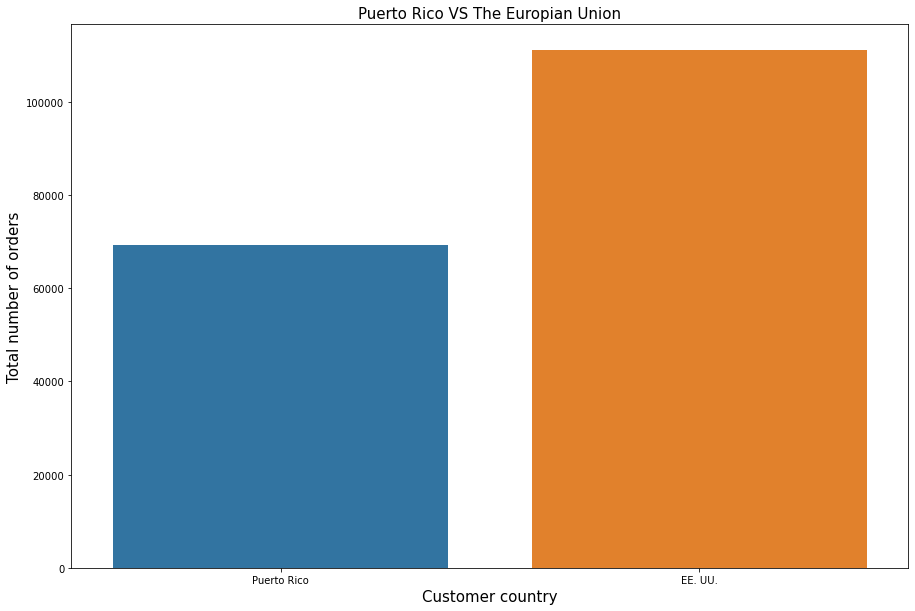

In [6]:
#Visualisation using countplot
sns.countplot(data=data_set,x=data_set['Customer Country'])

#Passing title
plt.title('Puerto Rico VS The Europian Union',fontsize=15)

#Giving x and y labels
plt.xlabel('Customer country',fontsize=15)
plt.ylabel('Total number of orders',fontsize=15)

#To display the graph
plt.show()

***Plotting a graph between the two countries Europian union and Puerto Rico to find the most ordered country region wise.***

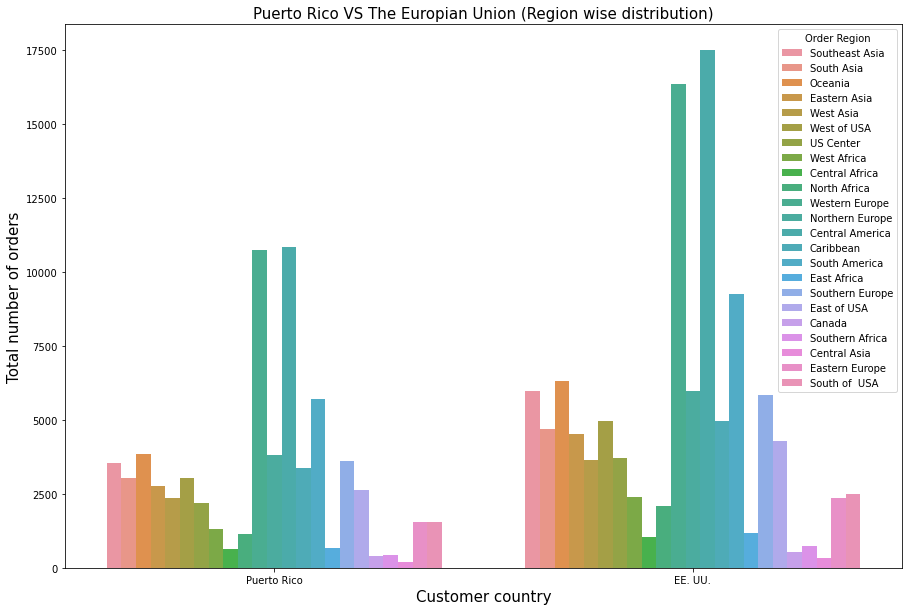

In [7]:
plt.figure(figsize=(15,10))
#Visualisation using countplot
sns.countplot(data=data_set,x=data_set['Customer Country'],hue=data_set['Order Region'])

#Passing title
plt.title('Puerto Rico VS The Europian Union (Region wise distribution)',fontsize=15)

#Giving x and y labels
plt.xlabel('Customer country',fontsize=15)
plt.ylabel('Total number of orders',fontsize=15)

#To display the graph
plt.show()

***Seperating the data according to customer country to find insights***

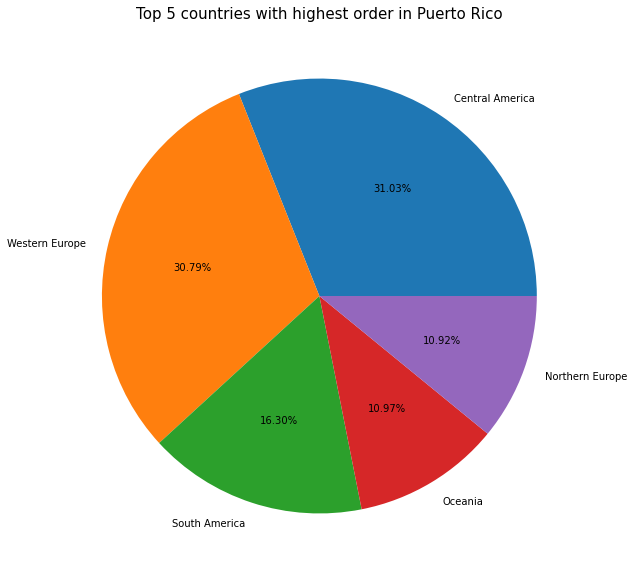

In [8]:
#Seperating the Countries to find insights 
#pr - Puerto Rico
#eu - European Union

pr = data_set[data_set['Customer Country'] == 'Puerto Rico']
eu = data_set[data_set['Customer Country'] == 'EE. UU.']

#Finding top 5 countries in Puerto Rico
labs_pr = pr['Order Region'].value_counts().index
vals_pr = pr['Order Region'].value_counts().values

#Plotting a pie chart
#Chart shows the top 5 countries with highest order in Puerto Rico
plt.pie(vals_pr[:5],labels=labs_pr[:5],autopct='%1.2f%%')

plt.title('Top 5 countries with highest order in Puerto Rico',fontsize=15)
plt.show()

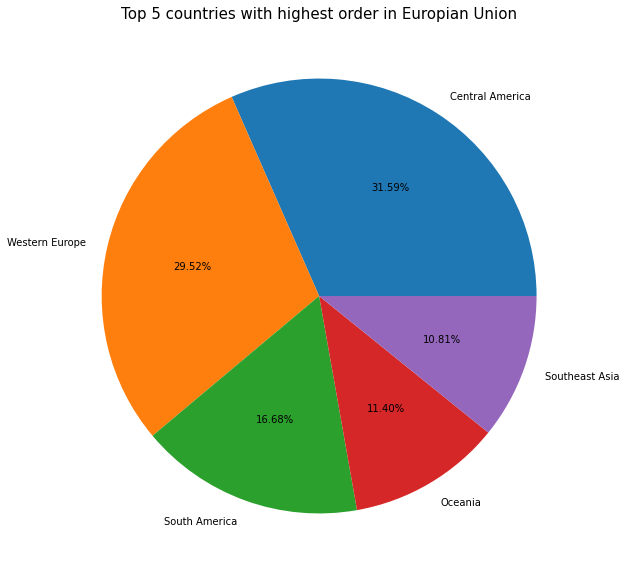

In [9]:
#Finding top 5 countries in Europian Union
labs_eu = eu['Order Region'].value_counts().index
vals_eu = eu['Order Region'].value_counts().values

#Plotting a pie chart
#Chart shows the top 5 countries with highest order in Europian Union
plt.pie(vals_eu[:5],labels=labs_eu[:5],autopct='%1.2f%%')

plt.title('Top 5 countries with highest order in Europian Union',fontsize=15)
plt.show()

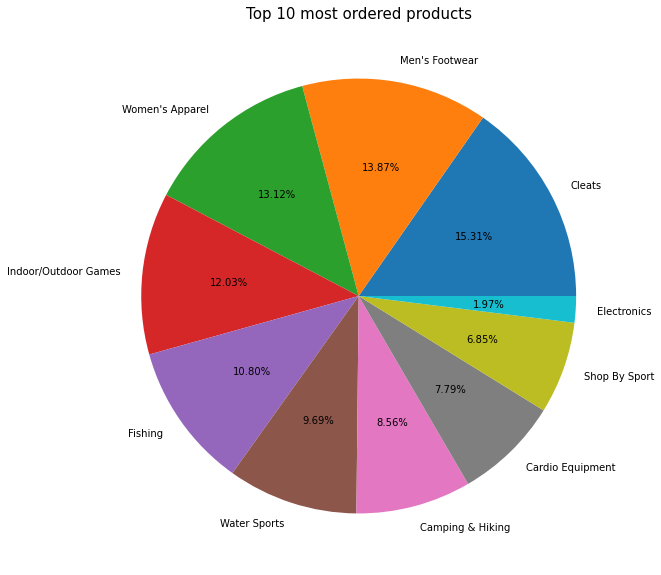

In [10]:
#Finding out top 10 ordered products
#Visualizing it using pie chart 
va = data_set['Category Name'].value_counts().values
lb = data_set['Category Name'].value_counts().index

plt.pie(va[:10],labels=lb[:10],autopct='%1.2f%%')
plt.title('Top 10 most ordered products',fontsize=15)

plt.show()

***Finding out the market with highest orders***

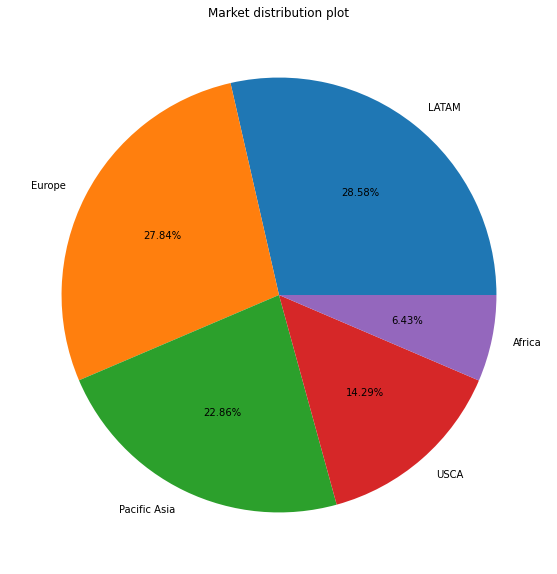

In [11]:
#Visualising to see the market with highest number orders
va2 = data_set.Market.value_counts().values
lb2 = data_set.Market.value_counts().index

plt.pie(va2,labels=lb2,autopct='%1.2f%%')
plt.title('Market distribution plot')

plt.show()

<AxesSubplot:xlabel='Customer Segment', ylabel='count'>

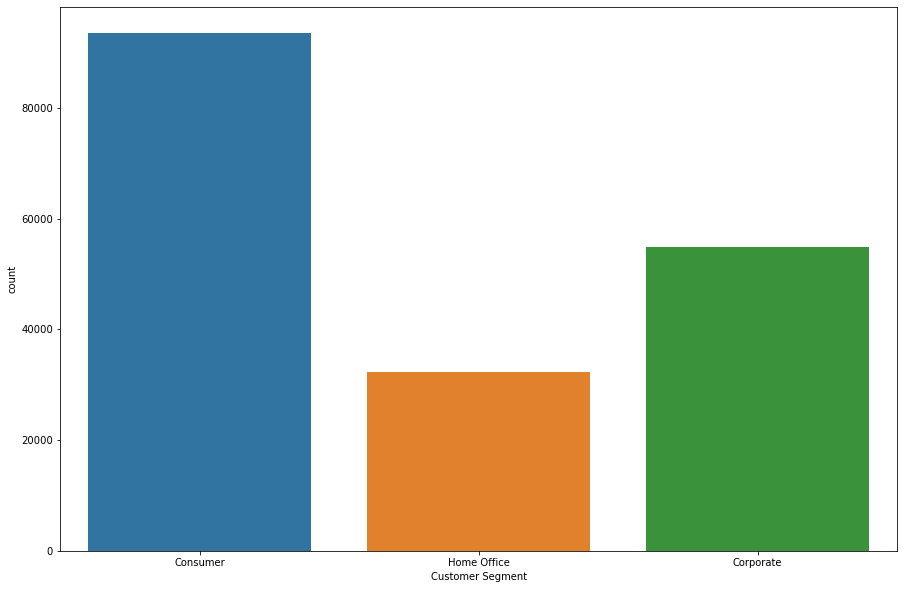

In [12]:
sns.countplot(data_set['Customer Segment'])

In [13]:
data_set.groupby(by=['Category Name'])['Sales per customer'].mean().sort_values(ascending=False)

Category Name
Computers               1347.047511
Garden                   478.854257
Strength Training        439.764320
Crafts                   414.679484
Cameras                  406.244390
Basketball               368.736263
Fishing                  359.419064
Children's Clothing      320.963774
Sporting Goods           294.295831
As Seen on  TV!          272.347205
Camping & Hiking         269.559591
Cardio Equipment         265.896588
Health and Beauty        263.420194
Music                    234.302511
Kids' Golf Clubs         233.004426
Consumer Electronics     227.233317
Women's Golf Clubs       220.908231
Women's Clothing         193.856816
Men's Clothing           189.258221
Golf Shoes               184.172653
Boxing & MMA             180.346856
Water Sports             180.054323
Soccer                   173.260505
Cleats                   162.227873
Golf Bags & Carts        154.160492
Men's Golf Clubs         149.762508
DVDs                     147.659171
Indoor/Outdoor

In [14]:
data_set.groupby(by=['Category Name'])['Benefit per order'].mean().sort_values(ascending=False)

Category Name
Computers               157.594593
Garden                   69.097128
Crafts                   52.750351
Cameras                  51.165203
Fishing                  43.649106
Children's Clothing      41.684202
Sporting Goods           35.066135
Music                    33.263410
Camping & Hiking         31.135230
Consumer Electronics     30.680742
Cardio Equipment         30.672788
Golf Bags & Carts        29.673279
Women's Clothing         29.389000
Soccer                   28.275000
Women's Golf Clubs       27.782541
Basketball               27.547313
Health and Beauty        26.225497
Golf Shoes               23.675706
Kids' Golf Clubs         23.556875
Water Sports             20.923228
Boxing & MMA             20.428771
Baseball & Softball      20.193244
Cleats                   20.147323
Men's Golf Clubs         19.498198
Tennis & Racquet         17.524329
Fitness Accessories      17.017443
Women's Apparel          16.658951
Indoor/Outdoor Games     16.501784
Girls'

<AxesSubplot:xlabel='Category Name', ylabel='count'>

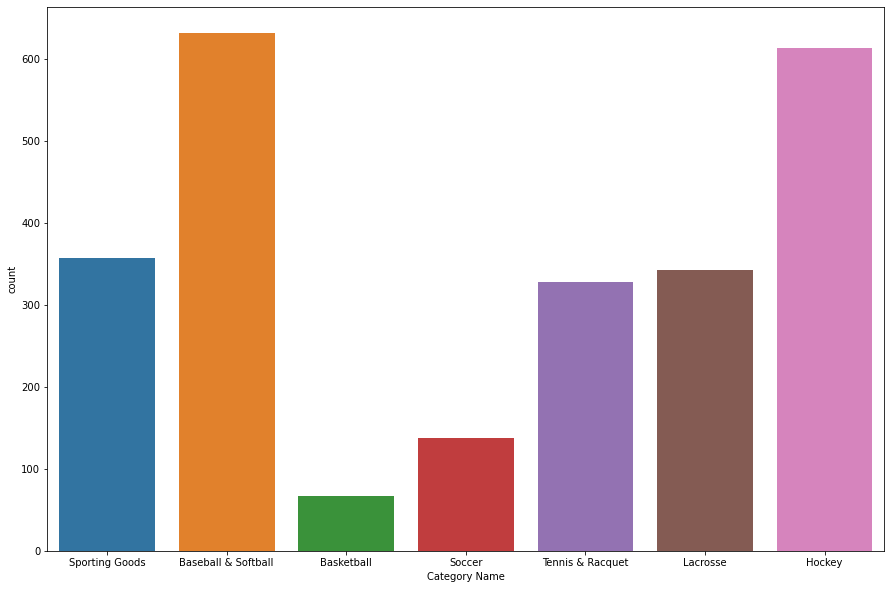

In [15]:
#Comparing category and department its in:
sns.countplot(x=data_set[data_set['Department Name']=='Fitness']['Category Name'])

<AxesSubplot:xlabel='Market'>

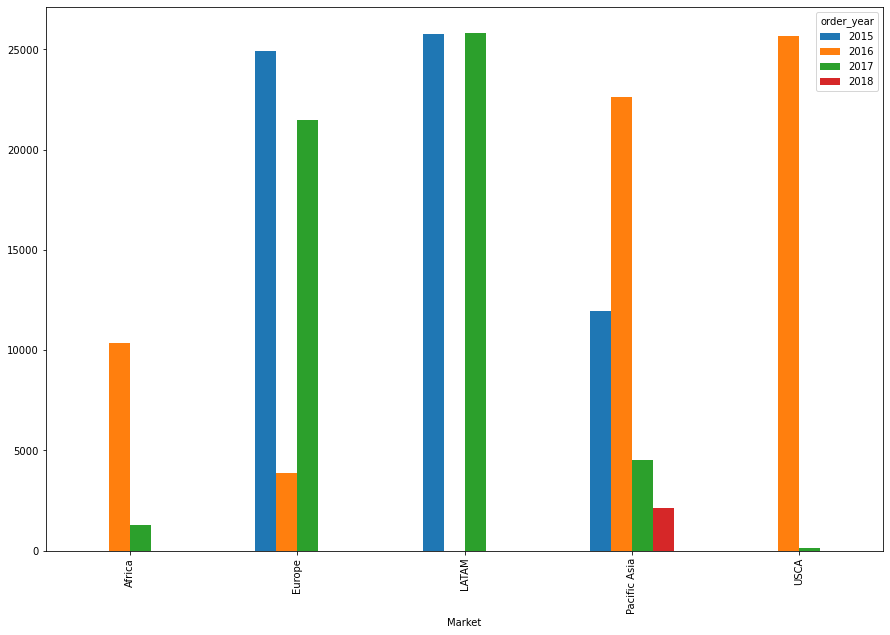

In [16]:
pd.crosstab(index=data_set['Market'],columns=data_set['order_year']).plot(kind='bar')

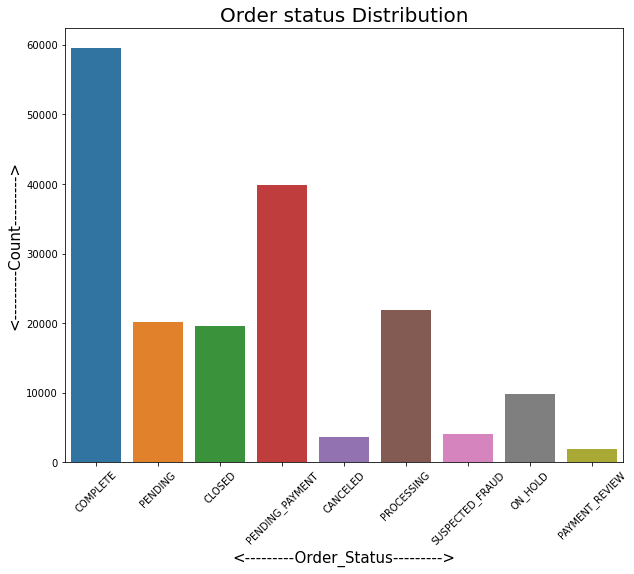

In [17]:
#Visualiation for Order status
plt.figure(figsize=(10,8))
sns.countplot(x=data_set['Order Status'])

plt.title('Order status Distribution',fontsize=20)

plt.xlabel('<---------Order_Status--------->',fontsize=15)
plt.ylabel('<---------Count--------->',fontsize=15)
plt.xticks(rotation=45)

plt.show()

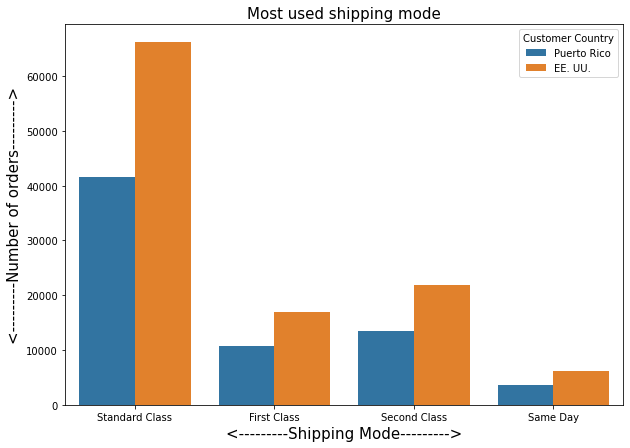

In [18]:
#Visualizing to find out the most used shipping method according to customer contry
plt.figure(figsize=(10,7))
sns.countplot(x=data_set['Shipping Mode'],hue=data_set['Customer Country'])

plt.title('Most used shipping mode',fontsize=15)
plt.xlabel('<---------Shipping Mode--------->',fontsize=15)
plt.ylabel('<---------Number of orders--------->',fontsize=15)

plt.show()

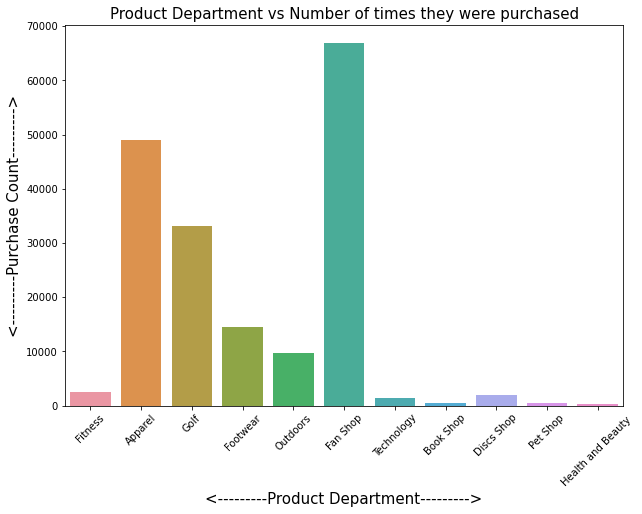

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x=data_set['Department Name'])

plt.title(('Product Department vs Number of times they were purchased'),fontsize=15)
plt.xlabel('<---------Product Department--------->',fontsize=15)
plt.ylabel('<---------Purchase Count--------->',fontsize=15)
plt.xticks(rotation=45)

plt.show()

In [20]:
dt_cat = data_set.select_dtypes(include='object')
dt_cat.head(3)

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class


In [21]:
dt_num = data_set.select_dtypes(include='number')
dt_num.head(3)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,NaN,1360,73,NaN,327.75,0,2018,1,31,2018,2,3
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,NaN,1360,73,NaN,327.75,0,2018,1,13,2018,1,18
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,-121.881279,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,NaN,1360,73,NaN,327.75,0,2018,1,13,2018,1,17


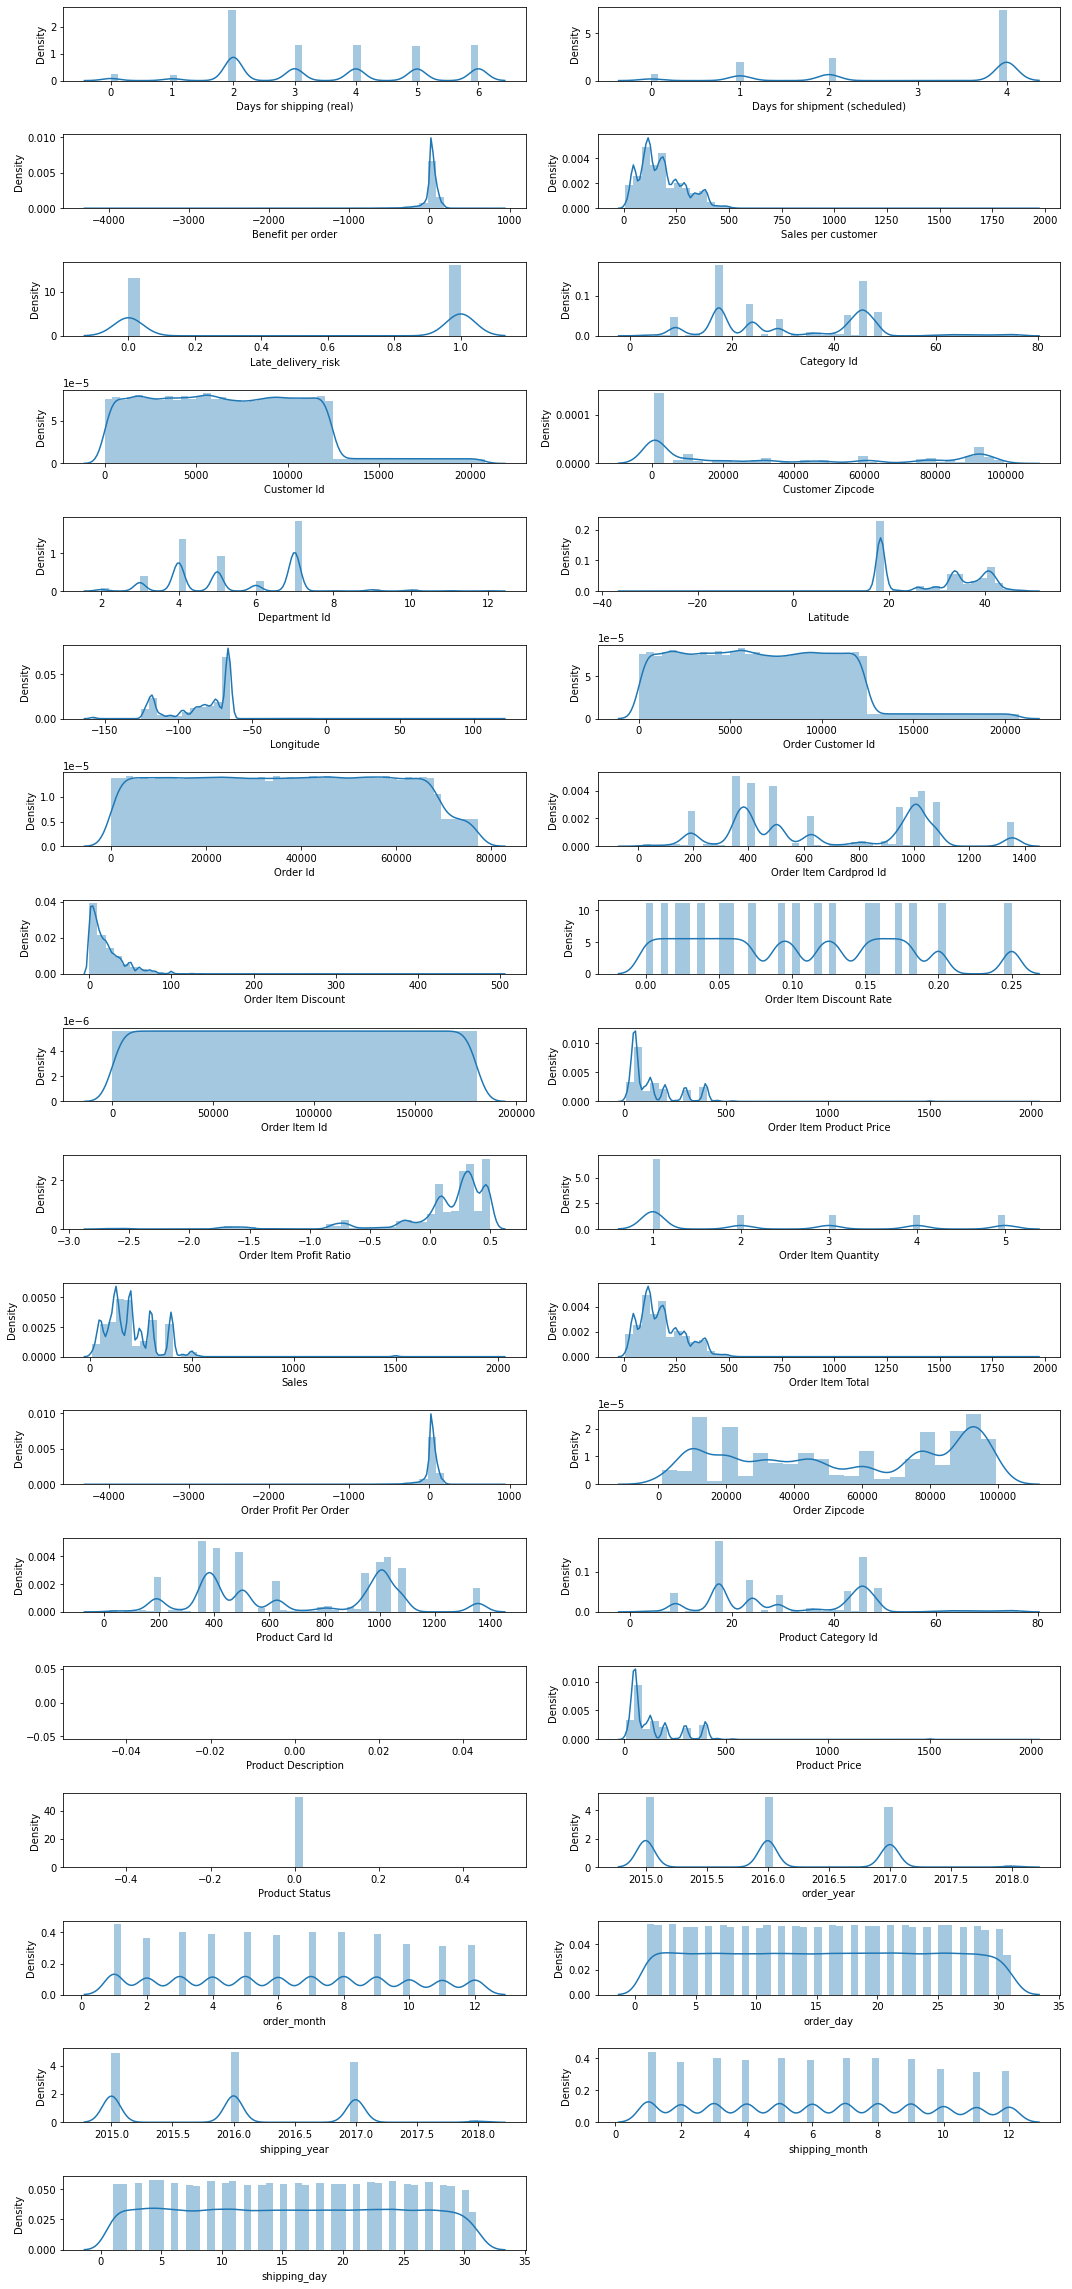

In [22]:
plt.figure(figsize=(15,35))
cols = dt_num.columns
nor = 20
noc = 2
it = 1
for i in cols:
    plt.subplot(nor,noc,it)
    sns.distplot(dt_num[i],kde=True)
    it += 1
plt.tight_layout()
plt.show()

In [23]:
data_set.skew().reset_index()

,index,0
0,Days for shipping (real),8.477127e-02
1,Days for shipment (scheduled),-7.319983e-01
2,Benefit per order,-4.741834e+00
3,Sales per customer,2.888446e+00
4,Late_delivery_risk,-1.940742e-01
5,Category Id,3.616248e-01
6,Customer Id,4.887683e-01
7,Customer Zipcode,4.908834e-01
8,Department Id,2.733206e-01
9,Latitude,-9.796267e-02


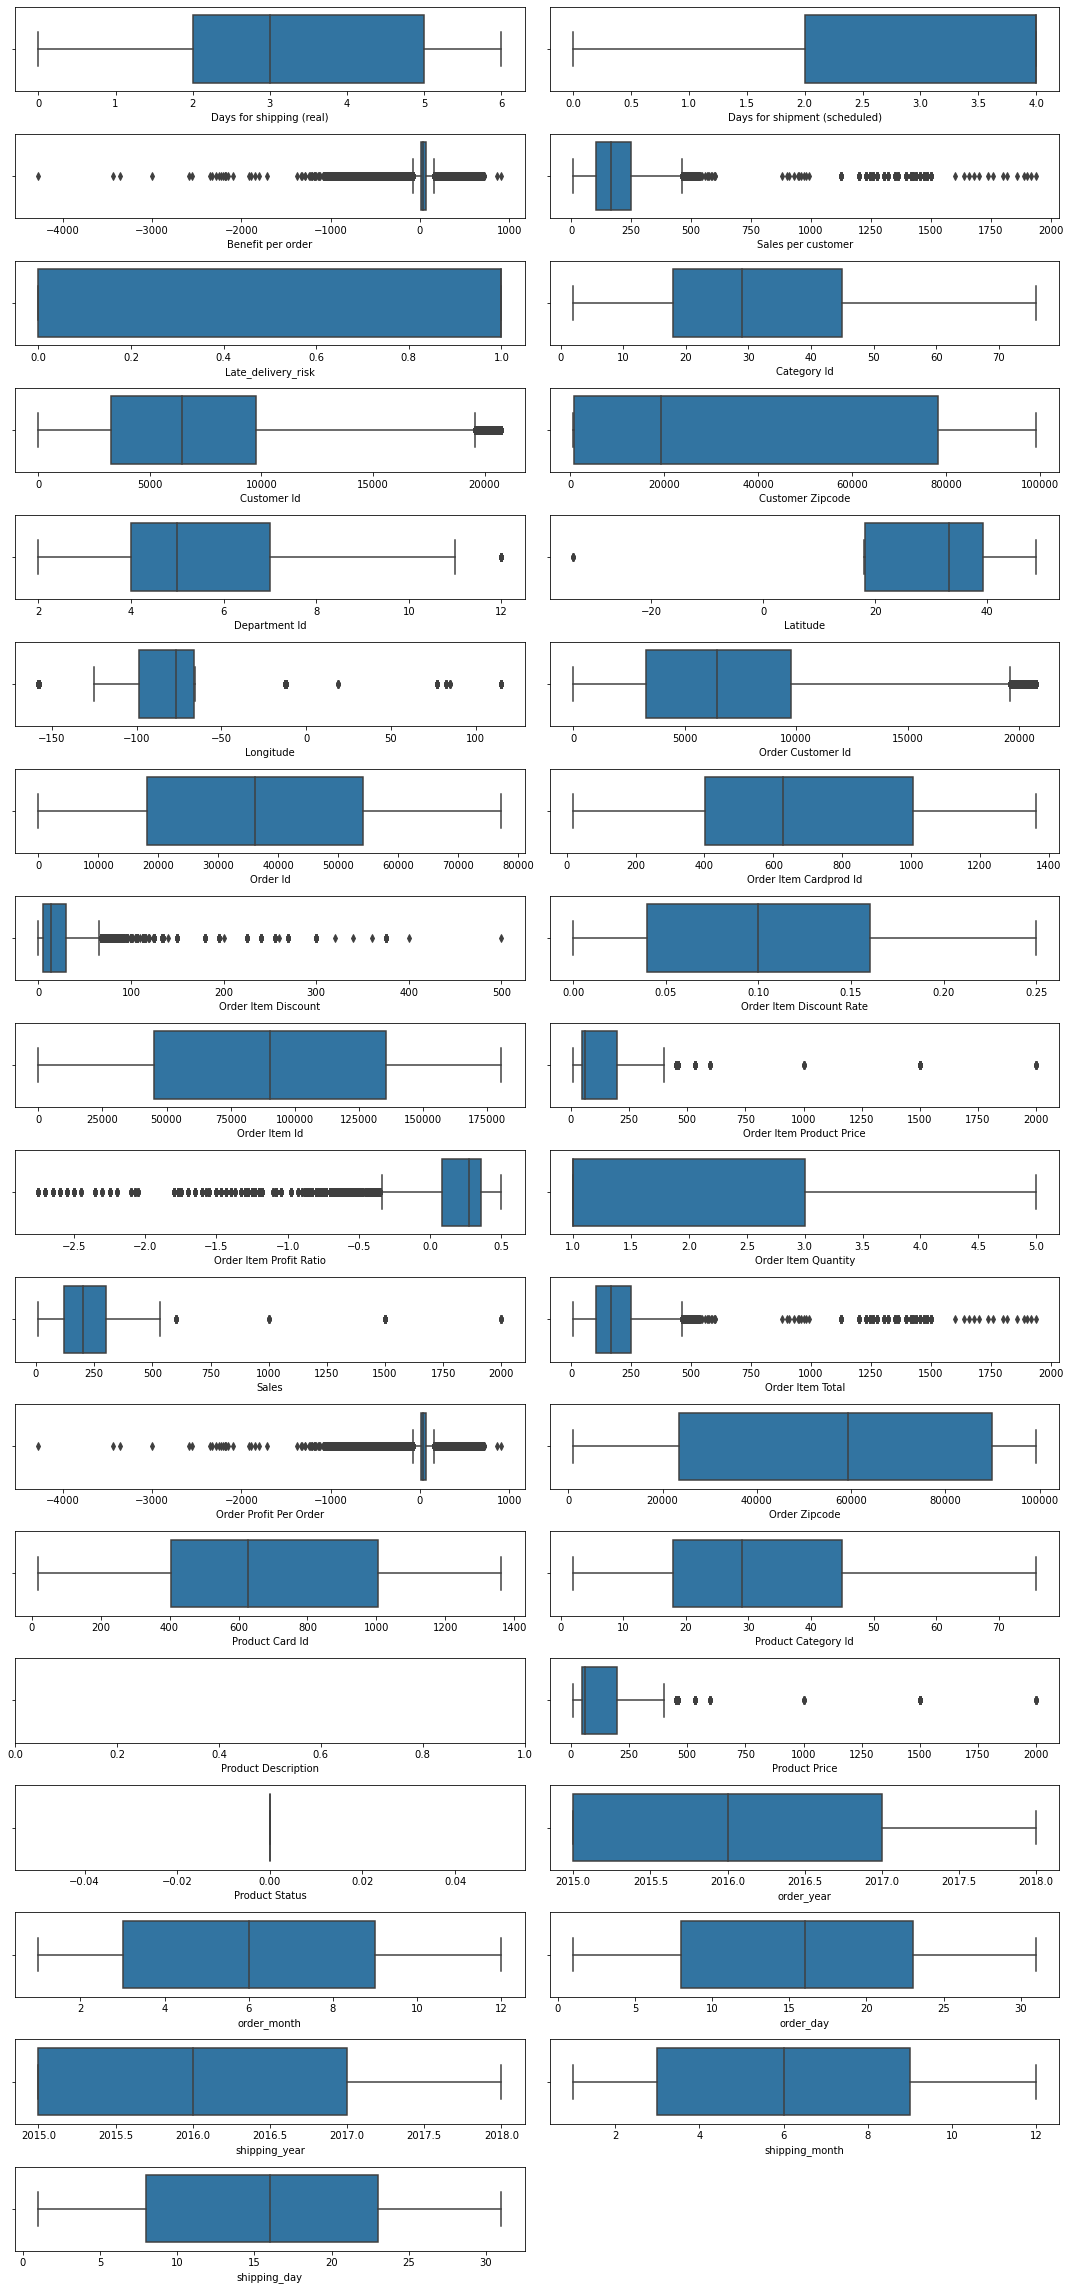

In [24]:
plt.figure(figsize=(15,35))
cols = dt_num.columns
nor = 20
noc = 2
it = 1
for i in cols:
    plt.subplot(nor,noc,it)
    sns.boxplot(dt_num[i])
    it += 1
plt.tight_layout()
plt.show()

#### Checking for significant and insignificant columns

In [25]:
from scipy.stats import stats

##### Performing hypothesis testing to find out significant columns

    H0: Both groups have equal mean indicating that they are insignificant
    H1: Both groups dont have equal mean indicating that they are significant 

In [26]:
#Numerical featuers:
sig_fet = []
insig_fet = []
for i in dt_num:
    if i != 'Sales':
        pval =stats.ttest_ind(data_set[i],data_set['Sales'])[1]
        if pval<0.05:
            sig_fet.append(i)
        else:
            insig_fet.append(i)
print('Significant Numerical featuers',sig_fet)
print("----------------------------------------------------")
print("Insignificatnt Numerical featuers",insig_fet)

Significant Numerical featuers ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price', 'Product Status', 'order_year', 'order_month', 'order_day', 'shipping_year', 'shipping_month', 'shipping_day']
----------------------------------------------------
Insignificatnt Numerical featuers ['Customer Zipcode', 'Order Zipcode', 'Product Description']


In [27]:
df = dt_num.drop(columns=['Customer Zipcode', 'Order Zipcode', 'Product Description'],axis=1)

df.head(10)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,3,4,91.250000,314.640015,0,73,20755,2,18.251453,-66.037056,20755,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,1360,73,327.75,0,2018,1,31,2018,2,3
1,5,4,-249.089996,311.359985,1,73,19492,2,18.279451,-66.037064,19492,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,1360,73,327.75,0,2018,1,13,2018,1,18
2,4,4,-247.779999,309.720001,0,73,19491,2,37.292233,-121.881279,19491,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,1360,73,327.75,0,2018,1,13,2018,1,17
3,3,4,22.860001,304.809998,0,73,19490,2,34.125946,-118.291016,19490,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,1360,73,327.75,0,2018,1,13,2018,1,16
4,2,4,134.210007,298.250000,0,73,19489,2,18.253769,-66.037048,19489,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,1360,73,327.75,0,2018,1,13,2018,1,15
5,6,4,18.580000,294.980011,0,73,19488,2,43.013969,-78.879066,19488,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,1360,73,327.75,0,2018,1,13,2018,1,19
6,2,1,95.180000,288.420013,1,73,19487,2,18.242538,-66.037056,19487,75934,1360,39.330002,0.12,179249,327.75,0.33,1,327.75,288.420013,95.180000,1360,73,327.75,0,2018,1,13,2018,1,15
7,2,1,68.430000,285.140015,1,73,19486,2,25.928869,-80.162872,19486,75933,1360,42.610001,0.13,179248,327.75,0.24,1,327.75,285.140015,68.430000,1360,73,327.75,0,2018,1,13,2018,1,15
8,3,2,133.720001,278.589996,1,73,19485,2,18.233223,-66.037056,19485,75932,1360,49.160000,0.15,179247,327.75,0.48,1,327.75,278.589996,133.720001,1360,73,327.75,0,2018,1,13,2018,1,16
9,2,1,132.149994,275.309998,1,73,19484,2,37.773991,-121.966629,19484,75931,1360,52.439999,0.16,179246,327.75,0.48,1,327.75,275.309998,132.149994,1360,73,327.75,0,2018,1,13,2018,1,15


##### Checking for redundant columns:

In [28]:
#To check if the columns have the same values we use this code.
#The combination package from the itertools comapres the each and every columns with all types of combination.
#Creating a code and passing it into def function so we can call it easily when needed.
from itertools import combinations

def check_redundancies(data):
    
    redundancy_list = []
    
    for i in list(combinations(data.columns, 2)):
        
        if all(data[i[0]] == data[i[1]]):
            redundancy_list.append(i)
            print("{}, {} -----> are the same".format(*i))
    
    return redundancy_list
                
redundancies = check_redundancies(df)

Benefit per order, Order Profit Per Order -----> are the same
Sales per customer, Order Item Total -----> are the same
Category Id, Product Category Id -----> are the same
Customer Id, Order Customer Id -----> are the same
Order Item Cardprod Id, Product Card Id -----> are the same
Order Item Product Price, Product Price -----> are the same


In [29]:
df_new = df.drop(columns=['Order Profit Per Order','Order Item Total',
                          'Product Category Id','Order Customer Id',
                          'Order Item Cardprod Id','Order Item Product Price'])

In [30]:
df_new

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Product Card Id,Product Price,Product Status,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,3,4,91.250000,314.640015,0,73,20755,2,18.251453,-66.037056,77202,13.110000,0.04,180517,0.29,1,327.750000,1360,327.750000,0,2018,1,31,2018,2,3
1,5,4,-249.089996,311.359985,1,73,19492,2,18.279451,-66.037064,75939,16.389999,0.05,179254,-0.80,1,327.750000,1360,327.750000,0,2018,1,13,2018,1,18
2,4,4,-247.779999,309.720001,0,73,19491,2,37.292233,-121.881279,75938,18.030001,0.06,179253,-0.80,1,327.750000,1360,327.750000,0,2018,1,13,2018,1,17
3,3,4,22.860001,304.809998,0,73,19490,2,34.125946,-118.291016,75937,22.940001,0.07,179252,0.08,1,327.750000,1360,327.750000,0,2018,1,13,2018,1,16
4,2,4,134.210007,298.250000,0,73,19489,2,18.253769,-66.037048,75936,29.500000,0.09,179251,0.45,1,327.750000,1360,327.750000,0,2018,1,13,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,7,40.640930,-73.942711,26043,0.000000,0.00,65177,0.10,1,399.980011,1004,399.980011,0,2016,1,16,2016,1,20
180515,3,2,-613.770019,395.980011,1,45,9141,7,35.362545,-119.018700,26037,4.000000,0.01,65161,-1.55,1,399.980011,1004,399.980011,0,2016,1,16,2016,1,19
180516,5,4,141.110001,391.980011,1,45,291,7,41.629959,-72.967155,26024,8.000000,0.02,65129,0.36,1,399.980011,1004,399.980011,0,2016,1,15,2016,1,20
180517,3,4,186.229996,387.980011,0,45,2813,7,18.213350,-66.370575,26022,12.000000,0.03,65126,0.48,1,399.980011,1004,399.980011,0,2016,1,15,2016,1,18


In [31]:
df_new.drop(columns=['Days for shipping (real)','Days for shipment (scheduled)',
                     'Late_delivery_risk','Latitude','Longitude','Product Status'],inplace=True)

#### We have dropped these columns as they are irrelevant to our problem statement

In [32]:
df_new

,Benefit per order,Sales per customer,Category Id,Customer Id,Department Id,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Product Card Id,Product Price,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,91.250000,314.640015,73,20755,2,77202,13.110000,0.04,180517,0.29,1,327.750000,1360,327.750000,2018,1,31,2018,2,3
1,-249.089996,311.359985,73,19492,2,75939,16.389999,0.05,179254,-0.80,1,327.750000,1360,327.750000,2018,1,13,2018,1,18
2,-247.779999,309.720001,73,19491,2,75938,18.030001,0.06,179253,-0.80,1,327.750000,1360,327.750000,2018,1,13,2018,1,17
3,22.860001,304.809998,73,19490,2,75937,22.940001,0.07,179252,0.08,1,327.750000,1360,327.750000,2018,1,13,2018,1,16
4,134.210007,298.250000,73,19489,2,75936,29.500000,0.09,179251,0.45,1,327.750000,1360,327.750000,2018,1,13,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,399.980011,45,1005,7,26043,0.000000,0.00,65177,0.10,1,399.980011,1004,399.980011,2016,1,16,2016,1,20
180515,-613.770019,395.980011,45,9141,7,26037,4.000000,0.01,65161,-1.55,1,399.980011,1004,399.980011,2016,1,16,2016,1,19
180516,141.110001,391.980011,45,291,7,26024,8.000000,0.02,65129,0.36,1,399.980011,1004,399.980011,2016,1,15,2016,1,20
180517,186.229996,387.980011,45,2813,7,26022,12.000000,0.03,65126,0.48,1,399.980011,1004,399.980011,2016,1,15,2016,1,18


In [34]:
df_new.corr().loc[['Sales']].T

,Sales
Benefit per order,0.131816
Sales per customer,0.989744
Category Id,0.227483
Customer Id,0.060961
Department Id,0.234718
Order Id,0.079835
Order Item Discount,0.617438
Order Item Discount Rate,0.000346
Order Item Id,0.079002
Order Item Profit Ratio,-0.001766


In [35]:
ss=df_new.corr().loc[['Sales']].T

In [36]:
ss[ss>=0.05]

,Sales
Benefit per order,0.131816
Sales per customer,0.989744
Category Id,0.227483
Customer Id,0.060961
Department Id,0.234718
Order Id,0.079835
Order Item Discount,0.617438
Order Item Discount Rate,NaN
Order Item Id,0.079002
Order Item Profit Ratio,NaN


#### Removing columns with correlation less than 0.05 and Sales per customer as its near 100% correlation

In [37]:
df_new=df_new.drop(["Sales per customer","Order Item Profit Ratio",'order_day','shipping_day','Order Item Discount Rate'],axis=1)

In [46]:

df_new

,Benefit per order,Category Id,Customer Id,Department Id,Order Id,Order Item Discount,Order Item Id,Order Item Quantity,Sales,Product Card Id,Product Price,order_year,order_month,shipping_year,shipping_month
0,91.250000,73,20755,2,77202,13.110000,180517,1,327.750000,1360,327.750000,2018,1,2018,2
1,-249.089996,73,19492,2,75939,16.389999,179254,1,327.750000,1360,327.750000,2018,1,2018,1
2,-247.779999,73,19491,2,75938,18.030001,179253,1,327.750000,1360,327.750000,2018,1,2018,1
3,22.860001,73,19490,2,75937,22.940001,179252,1,327.750000,1360,327.750000,2018,1,2018,1
4,134.210007,73,19489,2,75936,29.500000,179251,1,327.750000,1360,327.750000,2018,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,45,1005,7,26043,0.000000,65177,1,399.980011,1004,399.980011,2016,1,2016,1
180515,-613.770019,45,9141,7,26037,4.000000,65161,1,399.980011,1004,399.980011,2016,1,2016,1
180516,141.110001,45,291,7,26024,8.000000,65129,1,399.980011,1004,399.980011,2016,1,2016,1
180517,186.229996,45,2813,7,26022,12.000000,65126,1,399.980011,1004,399.980011,2016,1,2016,1


In [39]:
df_new.isnull().sum()

Benefit per order      0
Category Id            0
Customer Id            0
Department Id          0
Order Id               0
Order Item Discount    0
Order Item Id          0
Order Item Quantity    0
Sales                  0
Product Card Id        0
Product Price          0
order_year             0
order_month            0
shipping_year          0
shipping_month         0
dtype: int64

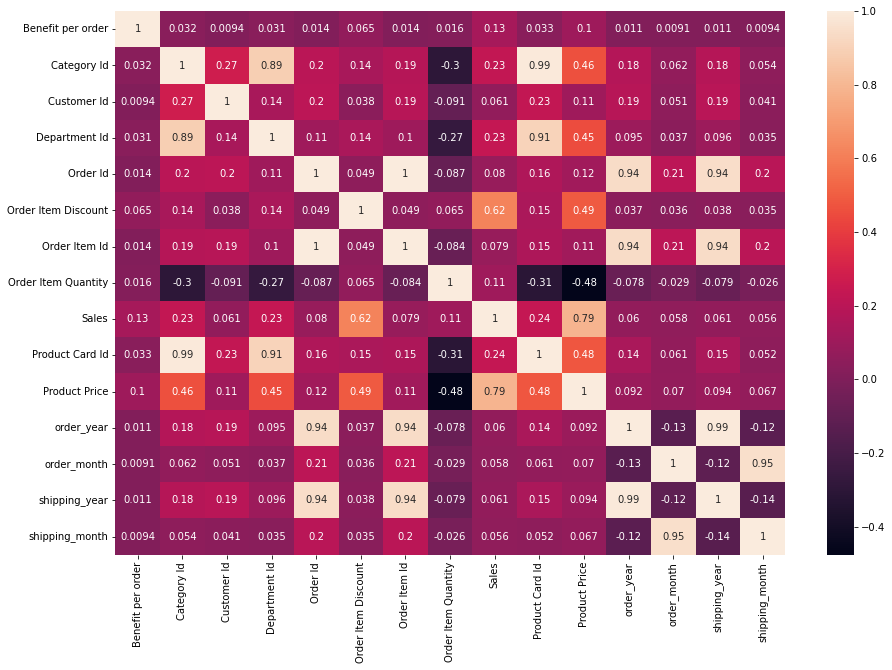

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [44]:
#Outlier treatement

q1 = df_new.quantile(0.20)
q3 = df_new.quantile(0.80)

IQR = q3-q1

up = q3+1.5*IQR
lp = q1-1.5*IQR

treated_df = df_new[(df_new>=lp) & (df_new<=up)]

treated_df

,Benefit per order,Category Id,Customer Id,Department Id,Order Id,Order Item Discount,Order Item Id,Order Item Quantity,Sales,Product Card Id,Product Price,order_year,order_month,shipping_year,shipping_month
0,91.250000,73,20755,2.0,77202,13.110000,180517,1,327.750000,1360,327.750000,2018,1,2018,2
1,NaN,73,19492,2.0,75939,16.389999,179254,1,327.750000,1360,327.750000,2018,1,2018,1
2,NaN,73,19491,2.0,75938,18.030001,179253,1,327.750000,1360,327.750000,2018,1,2018,1
3,22.860001,73,19490,2.0,75937,22.940001,179252,1,327.750000,1360,327.750000,2018,1,2018,1
4,134.210007,73,19489,2.0,75936,29.500000,179251,1,327.750000,1360,327.750000,2018,1,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,40.000000,45,1005,7.0,26043,0.000000,65177,1,399.980011,1004,399.980011,2016,1,2016,1
180515,NaN,45,9141,7.0,26037,4.000000,65161,1,399.980011,1004,399.980011,2016,1,2016,1
180516,141.110001,45,291,7.0,26024,8.000000,65129,1,399.980011,1004,399.980011,2016,1,2016,1
180517,186.229996,45,2813,7.0,26022,12.000000,65126,1,399.980011,1004,399.980011,2016,1,2016,1


In [45]:
treated_df.isnull().sum()

Benefit per order      12441
Category Id                0
Customer Id                0
Department Id            362
Order Id                   0
Order Item Discount     3671
Order Item Id              0
Order Item Quantity        0
Sales                    488
Product Card Id            0
Product Price            972
order_year                 0
order_month                0
shipping_year              0
shipping_month             0
dtype: int64

In [49]:
treated_df['Benefit per order']=treated_df['Benefit per order'].fillna(treated_df['Benefit per order'].median())
treated_df['Order Item Discount']=treated_df['Order Item Discount'].fillna(treated_df['Order Item Discount'].median())
treated_df['Product Price']=treated_df['Product Price'].fillna(treated_df['Product Price'].median())
treated_df['Sales']=treated_df['Sales'].fillna(treated_df['Sales'].median())
treated_df['Department Id']=treated_df['Department Id'].fillna(treated_df['Department Id'].mode()[0])

In [50]:
treated_df.isnull().sum()

Benefit per order      0
Category Id            0
Customer Id            0
Department Id          0
Order Id               0
Order Item Discount    0
Order Item Id          0
Order Item Quantity    0
Sales                  0
Product Card Id        0
Product Price          0
order_year             0
order_month            0
shipping_year          0
shipping_month         0
dtype: int64

In [52]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
def print_metrics(model,x,y):
    print('Accuracy score:',model.score(x,y))
    y_pred = model.predict(x)
    print('RMSE:',np.sqrt(mean_squared_error(y,y_pred)))
    print('MAPE:',mean_absolute_percentage_error(y,y_pred))

In [53]:
X = treated_df.drop('Sales',axis=1)
y = treated_df['Sales']

In [54]:
import statsmodels.api as sm

In [55]:
Xc = sm.add_constant(X)

In [56]:
model1 = sm.OLS(y,Xc).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 8.721e+04
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        21:07:07   Log-Likelihood:            -9.2650e+05
No. Observations:              180519   AIC:                         1.853e+06
Df Residuals:                  180504   BIC:                         1.853e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.363e+04   9

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
ghj=pd.DataFrame()
ghj['features']=X.columns
l=[]
for i in range(len(X.columns)):
    l.append(variance_inflation_factor(X,i))

In [81]:
ghj['vif']=l
ghj

,features,vif
0,Benefit per order,2.135499e+00
1,Category Id,7.671498e+02
2,Customer Id,4.884909e+00
3,Department Id,8.657436e+01
4,Order Id,1.784061e+04
5,Order Item Discount,2.879637e+00
6,Order Item Id,1.773661e+04
7,Order Item Quantity,5.633130e+00
8,Product Card Id,7.128595e+02
9,Product Price,5.994547e+00


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtr,xts,ytr,yts = train_test_split(X,y,random_state=100,test_size=0.3)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
model2 = lr.fit(xtr,ytr)

In [61]:
print('Train')
print_metrics(model2,xtr,ytr)
print("")
print('Test')
print_metrics(model2,xts,yts)

Train
Accuracy score: 0.8706068271947761
RMSE: 41.11080402149281
MAPE: 0.14749746243022066

Test
Accuracy score: 0.8725390736488932
RMSE: 40.73547287506929
MAPE: 0.14885927272918564


XGBoosting

In [62]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg_model = xg.fit(xtr,ytr)

In [63]:
print('Train')
print_metrics(xg_model,xtr,ytr)
print("")
print('Test')
print_metrics(xg_model,xts,yts)

Train
Accuracy score: 0.9999973029930215
RMSE: 0.18769008221511552
MAPE: 0.0004793014657313975

Test
Accuracy score: 0.9999862391020147
RMSE: 0.42326037711354825
MAPE: 0.0005886594037753415


AdaBoosting

In [64]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab_model = ab.fit(xtr,ytr)

In [65]:
print('Train')
print_metrics(ab_model,xtr,ytr)
print("")
print('Test')
print_metrics(ab_model,xts,yts)

Train
Accuracy score: 0.8032473903527957
RMSE: 50.69446453546134
MAPE: 0.3884059465890324

Test
Accuracy score: 0.803319415647502
RMSE: 50.60168419653672
MAPE: 0.39036361394302405


In [66]:
from sklearn.linear_model import Ridge,Lasso

In [67]:
#Ridge
ri = Ridge()
ri_model = ri.fit(xtr,ytr)

print('Train')
print_metrics(ri_model,xtr,ytr)
print("")
print('Test')
print_metrics(ri_model,xts,yts)

Train
Accuracy score: 0.8706068248751623
RMSE: 41.11080438998671
MAPE: 0.1474960911795338

Test
Accuracy score: 0.8725389094982952
RMSE: 40.735499105657254
MAPE: 0.1488582152922461


In [68]:
#Lasso
ls = Lasso()
ls_model = ls.fit(xtr,ytr)

print('Train')
print_metrics(ls_model,xtr,ytr)
print("")
print('Test')
print_metrics(ls_model,xts,yts)

Train
Accuracy score: 0.8696471172539391
RMSE: 41.262981907042864
MAPE: 0.1422236224269122

Test
Accuracy score: 0.8716311586158662
RMSE: 40.880296556014684
MAPE: 0.14319116642303553


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params={'learning_rate':[0.5,0.8,1],
       'n_estimators':[50,60,70]}

In [84]:
gs=GridSearchCV(estimator=ab,param_grid=params)

In [86]:
gs.fit(xtr,ytr)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 0.8, 1],
                         'n_estimators': [50, 60, 70]})

In [91]:
gs.best_params_

{'learning_rate': 1, 'n_estimators': 60}

In [90]:
ab = AdaBoostRegressor(learning_rate=(gs.best_params_)['learning_rate'], n_estimators=(gs.best_params_)['n_estimators'])
ab_model1 = ab.fit(xtr,ytr)
ab_model1

AdaBoostRegressor(learning_rate=1, n_estimators=60)

In [92]:
print('Train')
print_metrics(ab_model1,xtr,ytr)
print("")
print('Test')
print_metrics(ab_model1,xts,yts)

Train
Accuracy score: 0.8049501173102152
RMSE: 50.474629083021085
MAPE: 0.3866237318266114

Test
Accuracy score: 0.8045008465984907
RMSE: 50.449476893726
MAPE: 0.38894063000434703


* Hypertuning is done with the help of Grid search CV.
* The performance of the model has not increased and remains the same. 